# Project Overview

Proyek ini membahas mengenai pandangan (sentimen) seseorang terhadap Tokopedia. Tokpopedia merupakan sebuah startup bidang marketplace yang kini telah bertransformasi menjadi sebuah unicorn. Untuk itu, saya mencoba menganalisis bagaimana sentimen dari para pengguna tokopedia dari 10000 pengguna yang telah memberikan review terhadap tokopedia melalui google play store. By the way, proyek ini saya lakukan hanya sebagai research.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import re
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# Mengambil Data Reviews Tokopedia dari Google Play Store

Pada kali ini, target kita ialah 10.000 reviews yang paling relevan dan agar mempermudah tools yang kita pakai, maka reviews yang kita ambil ialah yang berbahasa inggris.

In [2]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews
result, contination_token = reviews("com.tokopedia.tkpd",
                                   lang = "en",sort = Sort.MOST_RELEVANT,
                                   count = 10000, filter_score_with= None)

Setelah data diperoleh, selanjutnya kita mentransformasi data tersebut ke dalam DataFrame.

In [3]:
df_tokped = pd.DataFrame(np.array(result), columns = ["review"])
df_tokped = df_tokped.join(pd.DataFrame(df_tokped.pop("review").tolist()))
df_tokped.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEprJnp-KqkB_PNCyBMxuQP7gMtm_8hrv5GyZn...,R N,https://play-lh.googleusercontent.com/a/AATXAJ...,Too much notification and I can't seem to disa...,1,27,3.61,2020-03-21 06:16:22,"Hi Robert, we are sorry if something is making...",2020-03-21 06:52:50
1,gp:AOqpTOG35bsmj2vq1yjEnC4GRUpT0StwIlb_Sb0Z-KP...,adhitya aji,https://play-lh.googleusercontent.com/a-/AOh14...,"New update ruins the feeds page UX, i have to ...",1,171,3.162.1,2022-02-23 10:59:59,Hai Toppers! Mohon maaf ya Kak kalau sudah mem...,2022-02-23 11:19:44
2,gp:AOqpTOGlkOxQsQL-0gOj5kIeBGeN16EgCyJmrIPTH67...,szubf,https://play-lh.googleusercontent.com/a-/AOh14...,took me a couple of hours to wait for my accou...,1,84,3.163,2022-02-24 23:13:09,"Hi Toppers, sorry for that. You can tell me ab...",2022-02-24 23:34:49
3,gp:AOqpTOGjVASFp9VQcj5AFicpHT9rutkWNO8oiAmsaaJ...,Lerry M,https://play-lh.googleusercontent.com/a-/AOh14...,"It ask me to verify. I photo my ID, then they ...",1,113,3.162,2022-02-17 16:58:46,"Hi Mr Lerry, we suggest you to report to the f...",2022-02-17 17:33:18
4,gp:AOqpTOEhaiHCIiUxGez-wiUpSPTXwQkyf3skwDPACy3...,Regina Ferani,https://play-lh.googleusercontent.com/a-/AOh14...,constantly updating apps in a short term and t...,3,20,3.162.1,2022-02-25 00:36:45,"Hai Toppers, Tokopedia will continue to improv...",2022-02-25 00:50:57


In [4]:
df = df_tokped[["userName", "score", "content"]]
df.head()

,userName,score,content
0,R N,1,Too much notification and I can't seem to disa...
1,adhitya aji,1,"New update ruins the feeds page UX, i have to ..."
2,szubf,1,took me a couple of hours to wait for my accou...
3,Lerry M,1,"It ask me to verify. I photo my ID, then they ..."
4,Regina Ferani,3,constantly updating apps in a short term and t...


Oke, kita sudah mendapatkan data yang kita inginkan dan telah ditransformasi ke dalam DataFrame. Setelahnya, aku ingin mengubah header agar lebih mudah dipahami.

In [5]:
df.rename(columns={"userName" : "Username", "score" : "Rating", "content" : "Review"}, inplace = True)
df.head()

,Username,Rating,Review
0,R N,1,Too much notification and I can't seem to disa...
1,adhitya aji,1,"New update ruins the feeds page UX, i have to ..."
2,szubf,1,took me a couple of hours to wait for my accou...
3,Lerry M,1,"It ask me to verify. I photo my ID, then they ..."
4,Regina Ferani,3,constantly updating apps in a short term and t...


Dari data di atas, terlihat terdapat "Rating". Dari situ, aku ingin tahu berapa banyak yang voting untuk rating 1 hingga 5. Serta berapa rating rata-rata dari 10.000 pengguna yang telah mereview tokopedia.

In [6]:
print("Berikut merupakan jumlah dari masing-masing rating")
print(df["Rating"].value_counts())
print("Rata-rata rating yang diberikan \noleh 10000 reviewer paling relevan ialah ", df["Rating"].mean())

Berikut merupakan jumlah dari masing-masing rating
5    6269
1    1686
4     965
3     568
2     512
Name: Rating, dtype: int64
Rata-rata rating yang diberikan 
oleh 10000 reviewer paling relevan ialah  3.9619


Dari output di atas, diperoleh bahwa sejumlah 6.269 reviewer memberikan rating "bintang 5" terhadap tokopedia. Kemudian diperoleh rating rata-rata ialah 3.9619. Selanjutnya, dari hasil tersebut, aku ingin memvisualisasikannya ke dalam bar chart.

Text(0.5, 1.0, 'Hasil Rating Tokopedia')

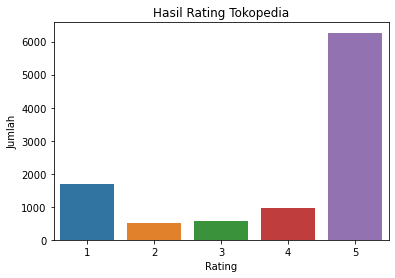

In [7]:
sns.countplot(data = df, x = "Rating")
plt.ylabel("Jumlah")
plt.title("Hasil Rating Tokopedia")

Kemudian, dari rating-rating tersebut dan hasil review yang telah kita peroleh, aku penasaran kira-kira apa keyword yang paling banyak digunakan untuk mereview tokopedia. Tentunya, keyword yang diperoleh mempertimbangkan hasil rating juga.

In [8]:
reviews = df
reviews.dropna(inplace = True)
rating_1 = reviews[reviews["Rating"] == 1]
rating_2 = reviews[reviews["Rating"] == 2]
rating_3 = reviews[reviews["Rating"] == 3]
rating_4 = reviews[reviews["Rating"] == 4]
rating_5 = reviews[reviews["Rating"] == 5]

In [9]:
reviews_sample = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis = 0)
reviews_sample.reset_index(drop = True, inplace = True)

In [10]:
negative_reviews = reviews_sample[reviews_sample["Rating"].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample["Rating"].isin([4,5])]
negative_reviews_str = negative_reviews["Review"].str.cat()
positive_reviews_str = positive_reviews["Review"].str.cat()

Dari beberapa kodingan di atas, kita telah membuat dua variabel yaitu :
1. negative_reviews_str = merupakan keyword dari hasil review bintang 1 dan 2
2. positive_reviews_str = merupakan keyword dari hasil review bintang 4 dan 5.

Selanjutnya, mari kita visualisasikan keyword yang telah kita peroleh.

Berikut merupakan hasil keyword dari reviewer yang memberikan bintang 1 dan 2


Text(0.5, 1.0, 'Reviews')

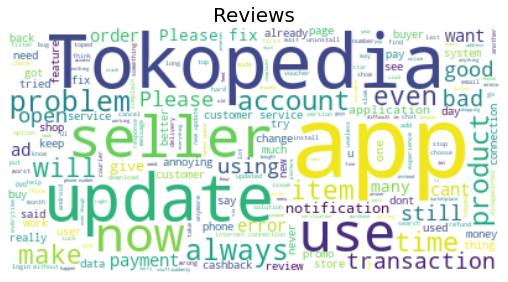

In [11]:
print("Berikut merupakan hasil keyword dari reviewer yang memberikan bintang 1 dan 2")
wordcloud_negative = WordCloud(background_color = "white").generate(negative_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation="bilinear")
ax1.axis("off")
ax1.set_title("Reviews", fontsize = 20)

Berikut merupakan hasil keyword dari reviewer yang memberikan bintang 4 dan 5


Text(0.5, 1.0, 'Reviews')

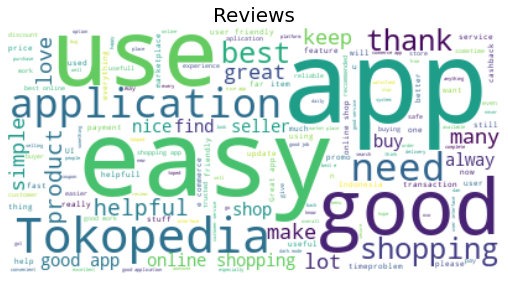

In [12]:
print("Berikut merupakan hasil keyword dari reviewer yang memberikan bintang 4 dan 5")
wordcloud_positive = WordCloud(background_color = "white").generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_positive,interpolation="bilinear")
ax1.axis("off")
ax1.set_title("Reviews", fontsize = 20)

Oke, kita sudah tau bagaimana rating dan keyword apa saja yang kebanyakan digunakan untuk mereview tokopedia. Berikutnya, mari kita analisis 10.000 reviews tersebut untuk mengetahui sentimen yang terjadi. Apakah sentimen positif, netral, atau negatif ? Mari kita coba !.

In [13]:
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
emptyline = []
for row in df["Review"]:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.123,0.877,0.000,-0.8460
1,0.084,0.831,0.084,0.2455
2,0.087,0.868,0.046,-0.4737
3,0.020,0.903,0.076,0.7946
4,0.050,0.794,0.155,0.7083


In [15]:
def sentiment(score):
    if score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

In [16]:
df["Sentiment"] = df_sentiments["compound"].apply(sentiment)

In [17]:
df.head()

,Username,Rating,Review,Sentiment
0,R N,1,Too much notification and I can't seem to disa...,Negative
1,adhitya aji,1,"New update ruins the feeds page UX, i have to ...",Positive
2,szubf,1,took me a couple of hours to wait for my accou...,Negative
3,Lerry M,1,"It ask me to verify. I photo my ID, then they ...",Positive
4,Regina Ferani,3,constantly updating apps in a short term and t...,Positive


Dari DataFrame di atas, pemograman kita telah mengklasifikasikan masing-masing sentimen dari "Review" yang diperoleh. Selanjutnya, mari kita cari tau berapa jumlah sentimen positif, netral, dan negatif.

In [18]:
df["Sentiment"].value_counts()

Positive    7354
Negative    1791
Neutral      855
Name: Sentiment, dtype: int64

Berdasarkan hasil data di atas, kita peroleh sejumlah 7.354 hasil review bermakna positif. Selanjutnya, mari kita visualisasikan hasil sentimen tersebut.

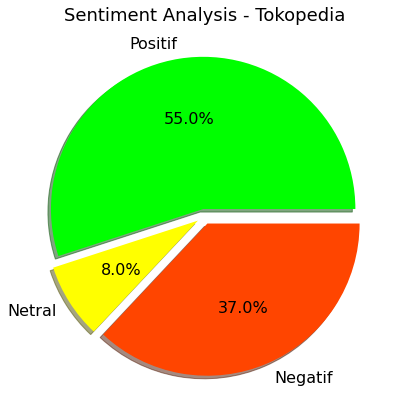

In [19]:
sentiment = ("Positif", "Netral", "Negatif")
votes = (55, 8, 37)
explode = (0.05, 0.05, 0.05)
colors = ("#00FF00", "#FFFF00", "#FF4500")
plt.figure(figsize = (7,7))
plt.title("Sentiment Analysis - Tokopedia", fontsize=18)
plt.pie(votes, labels = sentiment,
        autopct = "%1.1f%%", colors = colors,
        explode = explode, textprops={'fontsize': 16},
        shadow = True)
plt.show()

Berdasarkan visualisasi di atas, kita dapat menyimpulkan bahwa dari 10.000 reviews yang paling relevan, sejumlah 55% ialah sentimen positif, 8% ialah sentimen netral, dan 37% ialah sentimen negatif.

# Sekian dan Terima Kasih